<a href="https://colab.research.google.com/github/deva285/data-analytics-dn/blob/main/miniproject_9_Open_crime_UK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!ls -ltr /content/drive/MyDrive/ | grep*.csv

Mounted at /content/drive
/bin/bash: line 1: grep*.csv: command not found
ls: /content/drive/MyDrive/dataset: No such file or directory


In [ ]:
!ls -ltr /content/drive/MyDrive/dataset/dataset_csv/

total 52
dr-x------ 2 root root 4096 Feb 26  2022 dataset-titanic
dr-x------ 2 root root 4096 Feb 26  2022 dataset-powerlifting-csv
dr-x------ 2 root root 4096 Feb 26  2022 dataset_open_crime_uk
dr-x------ 2 root root 4096 Feb 26  2022 dataset-google-scholar
dr-x------ 2 root root 4096 Feb 26  2022 dataset_ebola
dr-x------ 2 root root 4096 Feb 26  2022 dataset-domestic-flights-from-1990-to-2009
dr-x------ 2 root root 4096 Feb 26  2022 dataset-covid-2
dr-x------ 2 root root 4096 Feb 26  2022 dataset-covid
dr-x------ 2 root root 4096 Feb 26  2022 dataset-airports
dr-x------ 2 root root 4096 Mar  5  2022 dataset-world-economy-worldbank
dr-x------ 2 root root 4096 Jun 21  2023 dataset-hr
dr-x------ 2 root root 4096 Jul 10  2024 dataset-museum-artifacts
dr-x------ 2 root root 4096 Nov 11 15:06 dataset-forest-fire


## **PART I**

In [ ]:
import os
import pandas as pd
from tabulate import tabulate
df = pd.read_csv('/content/drive/MyDrive/minipda/2025-01-merseyside-stop-and-search.csv')

print(tabulate(df.head(10), headers='keys', tablefmt='github'))

|    | Type                      | Date                      |   Part of a policing operation |   Policing operation |   Latitude |   Longitude | Gender   | Age range   | Self-defined ethnicity                                | Officer-defined ethnicity   | Legislation                                       | Object of search                   | Outcome                      |   Outcome linked to object of search |   Removal of more than just outer clothing |
|----|---------------------------|---------------------------|--------------------------------|----------------------|------------|-------------|----------|-------------|-------------------------------------------------------|-----------------------------|---------------------------------------------------|------------------------------------|------------------------------|--------------------------------------|--------------------------------------------|
|  0 | Person and Vehicle search | 2025-01-01T00:31:38+00:00 |                

### **1.1 Top 10 Type by number events. Type column is the event (see sample data in the end of this document ).**
### **Expected Output:**
### **type, num_events, rank**


In [ ]:
df_num = df.groupby('Type').size().to_frame('num_events').reset_index()
df_num['rank'] = df_num['num_events'].rank(ascending=False)
df_num = df_num.sort_values(by='rank', ascending=True)
print(tabulate(df_num, headers='keys', tablefmt='github'))

|    | Type                      |   num_events |   rank |
|----|---------------------------|--------------|--------|
|  1 | Person search             |         6928 |      1 |
|  0 | Person and Vehicle search |         1640 |      2 |
|  2 | Vehicle search            |          216 |      3 |


### **1.2 Top 10 Ethnics by number events. Use column “Officer-defined ethnicity”**
### **Expected Output:**
### **type, ethnicity, office_num_events, office_ethnic_rank**


In [ ]:
df_eth1 = df.groupby(['Type', 'Officer-defined ethnicity']).size().to_frame('office_num_events').reset_index()
df_eth1['office_ethnic_rank'] = df_eth1['office_num_events'].rank(ascending=False)
print(tabulate(df_eth1, headers='keys', tablefmt='github'))

|    | Type                      | Officer-defined ethnicity   |   office_num_events |   office_ethnic_rank |
|----|---------------------------|-----------------------------|---------------------|----------------------|
|  0 | Person and Vehicle search | Asian                       |                  68 |                    7 |
|  1 | Person and Vehicle search | Black                       |                  76 |                    6 |
|  2 | Person and Vehicle search | Other                       |                  56 |                    8 |
|  3 | Person and Vehicle search | White                       |                1392 |                    2 |
|  4 | Person search             | Asian                       |                 126 |                    4 |
|  5 | Person search             | Black                       |                 254 |                    3 |
|  6 | Person search             | Other                       |                 108 |                    5 |
|  7 | Per

### **1.3 Top 10 Ethnics by number events. Use column “Self-defined ethnicity”**
### **Expected Output:**
### **type, self_num_events, self_ethnic_rank**


In [ ]:
df_eth2 = df.groupby(['Type', 'Self-defined ethnicity']).size().to_frame('self_num_events').reset_index()
df_eth2['self_ethnic_rank'] = df_eth2['self_num_events'].rank(ascending=False)
df_eth2 = df_eth2.sort_values(by='self_ethnic_rank').head(10).reset_index(drop=True)
print(tabulate(df_eth2, headers='keys', tablefmt='github'))

|    | Type                      | Self-defined ethnicity                                                    |   self_num_events |   self_ethnic_rank |
|----|---------------------------|---------------------------------------------------------------------------|-------------------|--------------------|
|  0 | Person search             | White - English/Welsh/Scottish/Northern Irish/British                     |              5616 |                  1 |
|  1 | Person and Vehicle search | White - English/Welsh/Scottish/Northern Irish/British                     |              1268 |                  2 |
|  2 | Person search             | Other ethnic group - Not stated                                           |               266 |                  3 |
|  3 | Person search             | White - Any other White background                                        |               144 |                  4 |
|  4 | Person search             | White - Irish                                        

### **1.4 Merge 2 and 3 above on type.**
### **Expected Output:**
### **type, office_num_events, office_ethnic_rank, self_num_events, self_ethnic_rank**


In [ ]:
df_merge = df_eth1.merge(df_eth2, on=['Type'])
#df_merge = df_merge[['Type', 'office_num_events', 'office_ethnic_rank', 'self_num_events', 'self_ethnic_rank']]
print(tabulate(df_merge, headers='keys', tablefmt='github'))

|    | Type                      | Officer-defined ethnicity   |   office_num_events |   office_ethnic_rank | Self-defined ethnicity                                                    |   self_num_events |   self_ethnic_rank |
|----|---------------------------|-----------------------------|---------------------|----------------------|---------------------------------------------------------------------------|-------------------|--------------------|
|  0 | Person and Vehicle search | Asian                       |                  68 |                    7 | White - English/Welsh/Scottish/Northern Irish/British                     |              1268 |                  2 |
|  1 | Person and Vehicle search | Asian                       |                  68 |                    7 | White - Any other White background                                        |                58 |                 10 |
|  2 | Person and Vehicle search | Black                       |                  76 |      

### **1.5 Top 10 Type by Gender = Male.**
### **Expected Output:**
### **type, num_events_men, rank_men**


In [ ]:
df_male = df[df['Gender'] == 'Male']
df_male = df_male.groupby(['Type']).size().to_frame('num_events_men').reset_index()
df_male['rank_men'] = df_male['num_events_men'].rank(ascending=False)
df_male = df_male.sort_values(by='rank_men').reset_index(drop=True)
print(tabulate(df_male, headers='keys', tablefmt='github'))

|    | Type                      |   num_events_men |   rank_men |
|----|---------------------------|------------------|------------|
|  0 | Person search             |             5894 |          1 |
|  1 | Person and Vehicle search |             1436 |          2 |


### **1.6 type, num_events_men, rank_men**
### **Top 10 Type by Gender = Female.**
### **Expected Output:**
### **type, num_events_men, rank_women**


In [ ]:
df_female = df[df['Gender'] == 'Female']
df_female = df_female.groupby(['Type']).size().to_frame('num_events_women').reset_index()
df_female['rank_women'] = df_female['num_events_women'].rank(ascending=False)
df_female = df_female.sort_values(by='rank_women').reset_index(drop=True)
print(tabulate(df_female, headers='keys', tablefmt='github'))

|    | Type                      |   num_events_women |   rank_women |
|----|---------------------------|--------------------|--------------|
|  0 | Person search             |                750 |            1 |
|  1 | Person and Vehicle search |                168 |            2 |


### **1.7 Group bar chart plot (vertical) with output from 5 and 6.**
### **Bar 1 -> Male**
### **Bar 2 -> Female**


|    | Type                      | Gender   |   num_events |   rank |
|----|---------------------------|----------|--------------|--------|
|  0 | Person search             | Male     |         5894 |      1 |
|  1 | Person and Vehicle search | Male     |         1436 |      2 |
|  2 | Person search             | Female   |          750 |      3 |
|  3 | Person and Vehicle search | Female   |          168 |      4 |


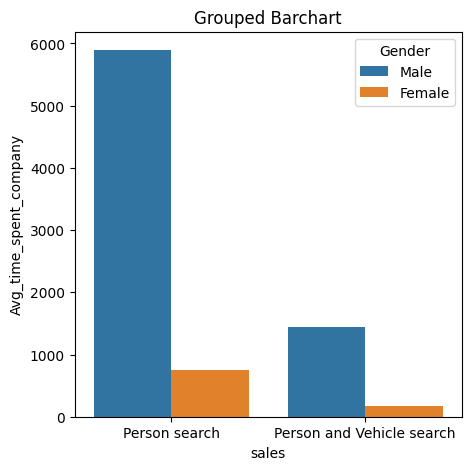

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

combined = df.groupby(['Type', 'Gender']).size().to_frame('num_events').reset_index()
combined['rank'] = combined['num_events'].rank(ascending=False)
combined = combined.sort_values(by='rank').reset_index(drop=True)
print(tabulate(combined, headers='keys', tablefmt='github'))
plt.figure(figsize=(5, 5))
sns.barplot(data=combined, x='Type', y='num_events', hue='Gender')
plt.title('Grouped Barchart')
plt.xlabel('sales')
plt.ylabel('Avg_time_spent_company')

plt.show()

### **1.8 For Gender = Male, number events by “Age range”**
### **Expected Output:**
### **type, age_range_male, num_events_male, rank_male**


In [ ]:
df_male_age = df[df['Gender'] == 'Male']
df_male_age = df_male_age.groupby(['Type', 'Age range']).size().to_frame('num_events_male').reset_index()
df_male_age['rank_male'] = df_male_age['num_events_male'].rank(ascending=False)
df_male_age = df_male_age.sort_values(by='rank_male').head(10).reset_index(drop=True)
df_male_age.columns = ['Type', 'age_range_male', 'num_events_male', 'rank_male']

print(tabulate(df_male_age, headers='keys', tablefmt='github'))

|    | Type                      | age_range_male   |   num_events_male |   rank_male |
|----|---------------------------|------------------|-------------------|-------------|
|  0 | Person search             | over 34          |              2094 |           1 |
|  1 | Person search             | 18-24            |              1414 |           2 |
|  2 | Person search             | 25-34            |              1364 |           3 |
|  3 | Person search             | 10-17            |              1006 |           4 |
|  4 | Person and Vehicle search | over 34          |               518 |           5 |
|  5 | Person and Vehicle search | 25-34            |               492 |           6 |
|  6 | Person and Vehicle search | 18-24            |               386 |           7 |
|  7 | Person and Vehicle search | 10-17            |                38 |           8 |


### **1.9 For Gender = Female, number events by “Age range”**
### **Expected Output:**
### **type, age_range_female, num_events_female, rank_female**


In [ ]:
df_female_age = df[df['Gender'] == 'Female']
df_female_age = df_female_age.groupby(['Type', 'Age range']).size().to_frame('num_events_female').reset_index()
df_female_age['rank_female'] = df_female_age['num_events_female'].rank(ascending=False)
df_female_age = df_female_age.sort_values(by='rank_female').head(10).reset_index(drop=True)
df_female_age.columns = ['Type', 'age_range_female', 'num_events_female', 'rank_female']
print(tabulate(df_female_age, headers='keys', tablefmt='github'))

|    | Type                      | age_range_female   |   num_events_female |   rank_female |
|----|---------------------------|--------------------|---------------------|---------------|
|  0 | Person search             | over 34            |                 304 |           1   |
|  1 | Person search             | 25-34              |                 182 |           2   |
|  2 | Person search             | 18-24              |                 150 |           3   |
|  3 | Person search             | 10-17              |                 112 |           4   |
|  4 | Person and Vehicle search | over 34            |                  56 |           5   |
|  5 | Person and Vehicle search | 18-24              |                  52 |           6.5 |
|  6 | Person and Vehicle search | 25-34              |                  52 |           6.5 |
|  7 | Person and Vehicle search | 10-17              |                   8 |           8   |


### **1.10 Merge 8 and 9 on column “type”**
### **Expected Output:**
### **type, age_range_male, num_events_male, rank_male, age_range_female, num_events_female, rank_female**


In [ ]:
df_combined = df_male_age.merge(df_female_age, on=['Type'])
print(tabulate(df_combined, headers='keys', tablefmt='github'))

|    | Type                      | age_range_male   |   num_events_male |   rank_male | age_range_female   |   num_events_female |   rank_female |
|----|---------------------------|------------------|-------------------|-------------|--------------------|---------------------|---------------|
|  0 | Person search             | over 34          |              2094 |           1 | over 34            |                 304 |           1   |
|  1 | Person search             | over 34          |              2094 |           1 | 25-34              |                 182 |           2   |
|  2 | Person search             | over 34          |              2094 |           1 | 18-24              |                 150 |           3   |
|  3 | Person search             | over 34          |              2094 |           1 | 10-17              |                 112 |           4   |
|  4 | Person search             | 18-24            |              1414 |           2 | over 34            |          